# Homework 2

Biochem 570 - Tyson Wheelwright

## Section 1 - Python Functions

#### 1.1 Reverse Complement - Part 1

Transcend to power nerd status by writing your first function. It should use the template below, taking
as input an uppercase DNA string and returning the reverse complement string. (If you’re an experienced
Python user, ignore the hints and try to write the function smaller than my best effort: 128 characters, not
including whitespace and comments.)

In [29]:
def reverse_complement(dna_string): # function header
    base_pairs = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    reverse_complement_list = []
    reverse_dna = dna_string[::-1]

    for bp in reverse_dna:
        assert bp in base_pairs, f"ERROR '{bp}' NOT FOUND IN REFERENCE DICTIONARY" #error check
        reverse_complement_list.append(base_pairs[bp])

    reverse_complement_string = ''.join(reverse_complement_list)
    
    return reverse_complement_string

test_string = "ACGAAAGAGCTTAAGGCAGGCCAATTCGCACTGTCAGGGTCACTTGGGTGTTTAGCACTACCGACAGGTACGCTAGTATGCGTTCTTCCTACCAGAGGTC"
test_reverse_check = "GACCTCTGGTAGGAAGAACGCATACTAGCGTACCTGTCGGTAGTGCTAAACACCCAAGTGACCCTGACAGTGCGAATTGGCCTGCCTTAAGCTCTTTCGT"

reverse_complement_string = reverse_complement(test_string)

if  reverse_complement_string == test_reverse_check:
    print(f'SUCCESS: {reverse_complement_string = }')
else:
    print("LESS SUCCESSFUL")

SUCCESS: reverse_complement_string = 'GACCTCTGGTAGGAAGAACGCATACTAGCGTACCTGTCGGTAGTGCTAAACACCCAAGTGACCCTGACAGTGCGAATTGGCCTGCCTTAAGCTCTTTCGT'


#### 1.2 Reverse Complement - Part 2

What happens if the string passed into your function contains a character that is not A, C, G, or T? Re-save
the previous script as “BC570_HW2_1-2.py” and modify it to check the input sequence for invalid characters,
returning None if dna_string contains an invalid character. Hint: Loop over dna_string and use a conditional
(if statement) to check each character’s validity.

In [30]:
#I guess I already did this.. haha.
#I'll just re-paste my code here.
#I also did error checking with a known reverse complement from online. 

def reverse_complement(dna_string): # function header
    base_pairs = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    reverse_complement_list = []
    reverse_dna = dna_string[::-1]

    for bp in reverse_dna:
        assert bp in base_pairs, f"ERROR '{bp}' NOT FOUND IN REFERENCE DICTIONARY" #error check
        reverse_complement_list.append(base_pairs[bp])

    reverse_complement_string = ''.join(reverse_complement_list)
    
    return reverse_complement_string

test_string = "ACGAAAGAGCTTAAGGCAGGCCAATTCGCACTGTCAGGGTCACTTGGGTGTTTAGCACTACCGACAGGTACGCTAGTATGCGTTCTTCCTACCAGAGGTC"
test_reverse_check = "GACCTCTGGTAGGAAGAACGCATACTAGCGTACCTGTCGGTAGTGCTAAACACCCAAGTGACCCTGACAGTGCGAATTGGCCTGCCTTAAGCTCTTTCGT"

reverse_complement_string = reverse_complement(test_string)

if  reverse_complement_string == test_reverse_check:
    print(f'SUCCESS: {reverse_complement_string = }')
else:
    print("LESS SUCCESSFUL")

SUCCESS: reverse_complement_string = 'GACCTCTGGTAGGAAGAACGCATACTAGCGTACCTGTCGGTAGTGCTAAACACCCAAGTGACCCTGACAGTGCGAATTGGCCTGCCTTAAGCTCTTTCGT'


## Section 2 - Euler's Method

#### 2.1 Be the computer

While working in a research lab on campus, you are assigned to model how a culture containing the newly
discovered strain C. diff eq grows over time. Right before you start, a solar flare knocks out campus power.
Being a typical professor, your boss expects you to complete your work regardless. Remember that in Euler’s
method a(t + t_step) = a(ti) + a′(ti) ∗t_step. Use Euler’s method to predict the growth of the
culture at the following timepoints, given a population-dependent growth rate of  
da/dt = a(2 −a)/2

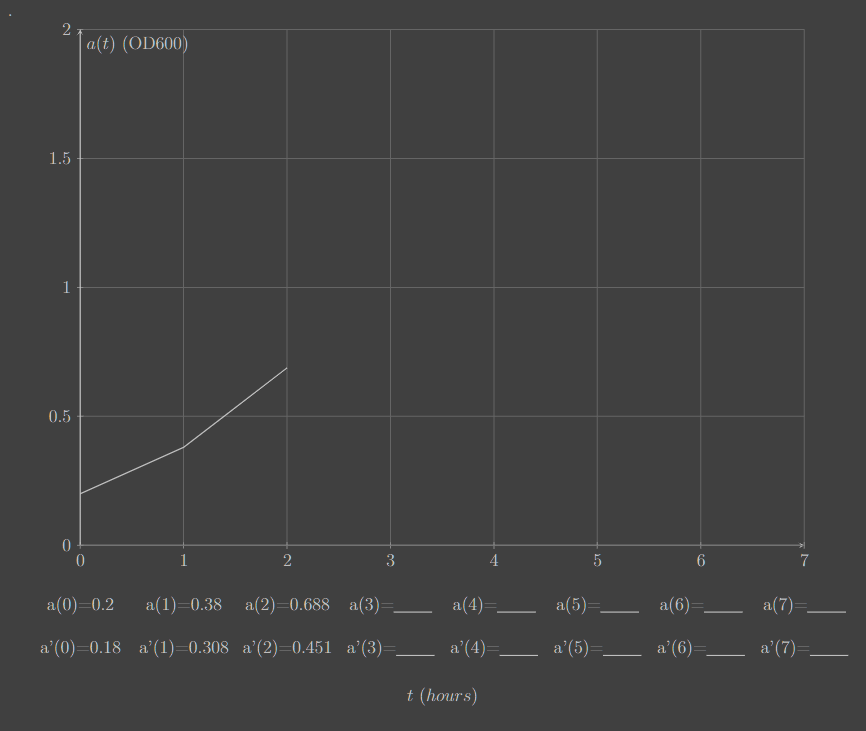

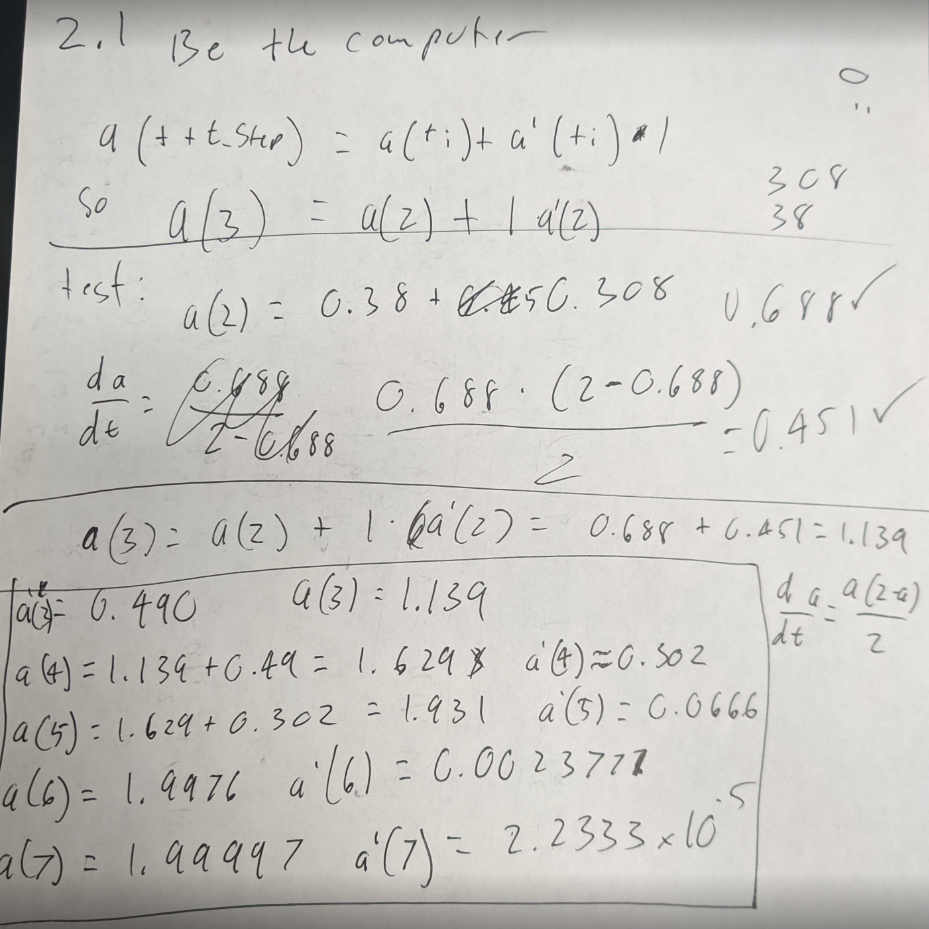

#### 2.2 Programming is actually useful

Just as the novelty of being a human computer wears off and the existential dread creeps back in, the power
comes back on. You decide to write a Python function to avoid having to do that by hand ever again.
Use the template below to write an Euler’s method Python script and submit it to canvas as

In [31]:
def eulers_method(fun, t_span, y0, t_step):
    ''' Euler's method in one dimension.
    Arguments:
    fun: Python function of the form f(t, y) representing the dy/dt formula.
    t_span: Length 2 list specifying the start and end t values.
    y_0: The initial value for y.
    step_size: Size of the t step taken in each iteration.
    '''
    
    # get initial and final t values
    t0, tf = t_span
    # initialize t and y with initial values
    t = t0
    y = y0
    # initialize lists ret_t and ret_y. These will hold the calculated values and be returned.
    ret_t = []
    ret_y = []
    # loop, calculate y and increment t
    while t <= tf:
    # append t to ret_t, y to ret_y
        ret_t.append(t)
        ret_y.append(y)
    # add fun(t, y)*t_step to y
        y += fun(t,y)*t_step
    # increment t by t_step
        t += t_step
    return ret_t, ret_y

#### 2.3 Graphs make ugly data look pretty

Try out your new script with the values from problem 2.1. E.g. with

and print out the return value from the function.
Compare the return value to the return value given by scipy solve_ivp function and plot the function
return values for both both function using Matplotlib.

In [32]:
t_span = (0, 7)
y0 = 0.2

t_step = 1
def eulers_dydt(t, y):
    return y * (2 - y) / 2
t_euler, y_euler = eulers_method(eulers_dydt, t_span, y0, t_step)
print(f'{t_euler = }\n{y_euler = }')

t_euler = [0, 1, 2, 3, 4, 5, 6, 7]
y_euler = [0.2, 0.38, 0.6878, 1.13906558, 1.629395962229632, 1.9313263235941498, 1.9976419630844522, 1.9999972198309524]


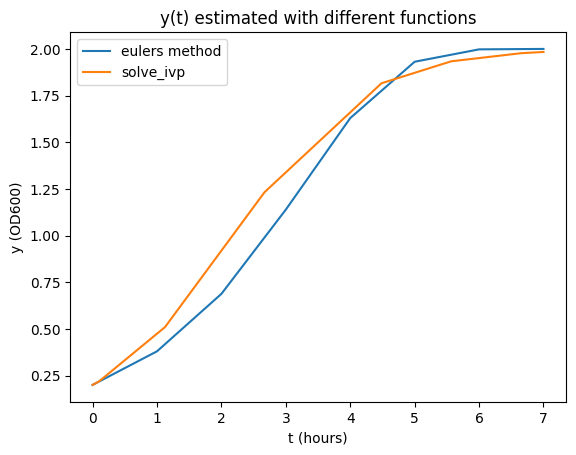

In [33]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

# solve_ivp takes a vector as input, allowing for multiple variable functions
y0 = [y0]
# for solve_ivp, y is a list and derivative function must return a list
def ivp_dydt(t, y):
    y1 = y[0]
    return [y1 * (2 - y1) / 2]

# solve_ivp returns an bunch object
bunch = solve_ivp(ivp_dydt, t_span, y0)
t_sivp = bunch.t
y_sivp = bunch.y[0] # also returns multiple variables, need to select first
plt.plot(t_euler, y_euler) # plot your function result
plt.plot(t_sivp, y_sivp) # plot scipy function result
plt.title('y(t) estimated with different functions')
plt.xlabel('t (hours)')
plt.ylabel('y (OD600)')
plt.legend(['eulers method', 'solve_ivp'])
# plt.savefig('BC570_HW2_2−4.png') # uncomment to save figure as png
plt.show()

You can use this script as a template for solving ODEs in the future. Save the script as

#### 2.4 Analytical form

Solve the differential equation with the initial condition y(0) = 0.2 to get an explicit formula for y(t). Add the
result to the plot from the previous section (hint: use numpy.linspace to get a list of t values and define a new
function with the integrated function to get the y values). Note that most models in real research do not have
nice analytical solutions; this one was chosen to illustrate the results from Euler’s method and solve_ivp. Save
the plot with the Euler’s method, solve_ivp, and analytical curves as “BC570_HW2_2-4.png”
and submit it on Canvas. Speculate on why your Euler’s method code might be performing
differently from solve_ivp. (Just give it your best guess.)

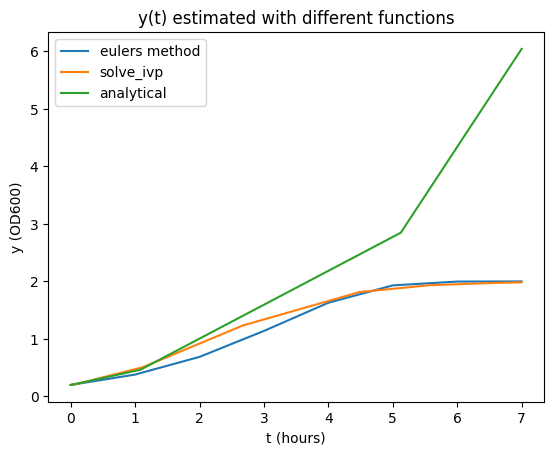

In [34]:
def ivp_dydt(t, y):
    y1 = y[0]
    return [y1 * (2 - y1) / 2]


#DIFFERENT
def analytical_ode(t, y):
    # print(f"{solution = }")
    return (2 * 0.1 * (np.e ** y)) / (1 + 0.1 * (np.e ** y))



analytical_sol = solve_ivp(analytical_ode, t_span, y0)



# solve_ivp returns an bunch object
bunch = solve_ivp(ivp_dydt, t_span, y0)
t_sivp = bunch.t
y_sivp = bunch.y[0] # also returns multiple variables, need to select first
plt.plot(t_euler, y_euler) # plot your function result
plt.plot(t_sivp, y_sivp) # plot scipy function result
plt.plot(analytical_sol.t, analytical_sol.y[0])
plt.title('y(t) estimated with different functions')
plt.xlabel('t (hours)')
plt.ylabel('y (OD600)')
plt.legend(['eulers method', 'solve_ivp', 'analytical'])
# plt.savefig('BC570_HW2_2−4.png') # uncomment to save figure as png
plt.show()




## Section 3 - Chemical Reaction Networks Part 2

Please complete Mathematical Modeling in Systems Biology (MMSB) book problems: 2.4.6, 2.4.7, and 2.4.9

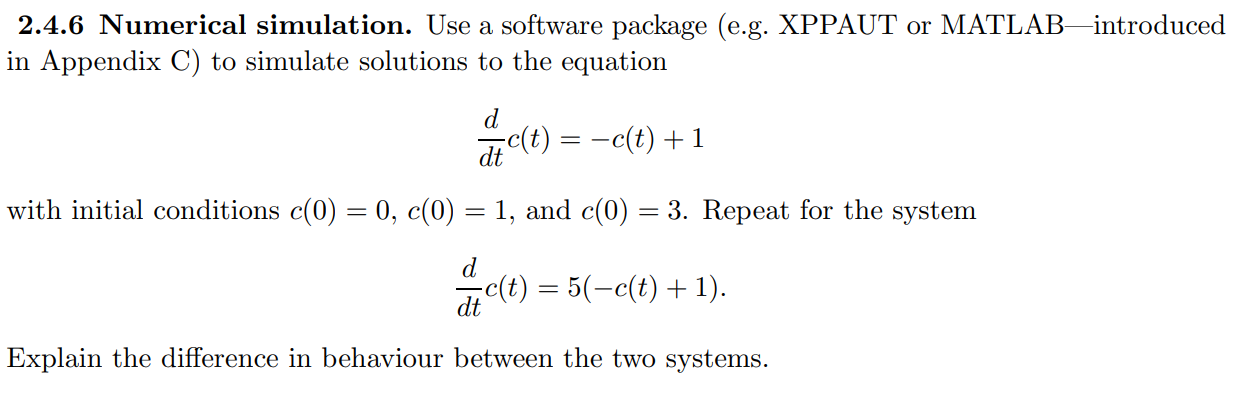

Text(0, 0.5, 'Concentration')

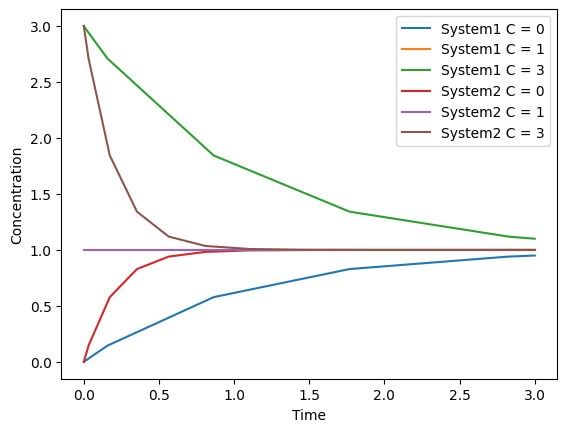

In [35]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def system1(t, y):
    return -y+1

def system2(t, y):
    return 5 * (-y + 1)

# the time interval of the simulation
tspan = [0,3]

# set initial conditions
y0 = [0, 1, 3]

# integrate the ODE
sol1 = solve_ivp(system1, tspan, y0)
sol2 = solve_ivp(system2, tspan, y0)

plt.plot(sol1.t, sol1.y.T)
plt.plot(sol2.t, sol2.y.T)
plt.legend(['System1 C = 0', 'System1 C = 1', 'System1 C = 3', 'System2 C = 0', 'System2 C = 1', 'System2 C = 3'])
plt.xlabel('Time')
plt.ylabel('Concentration')

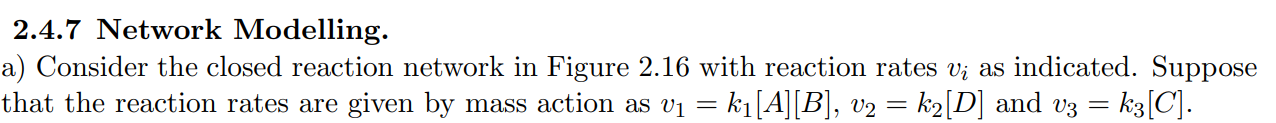

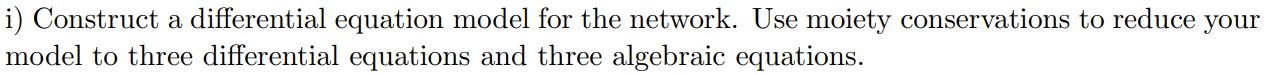

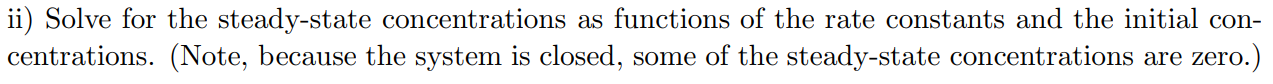

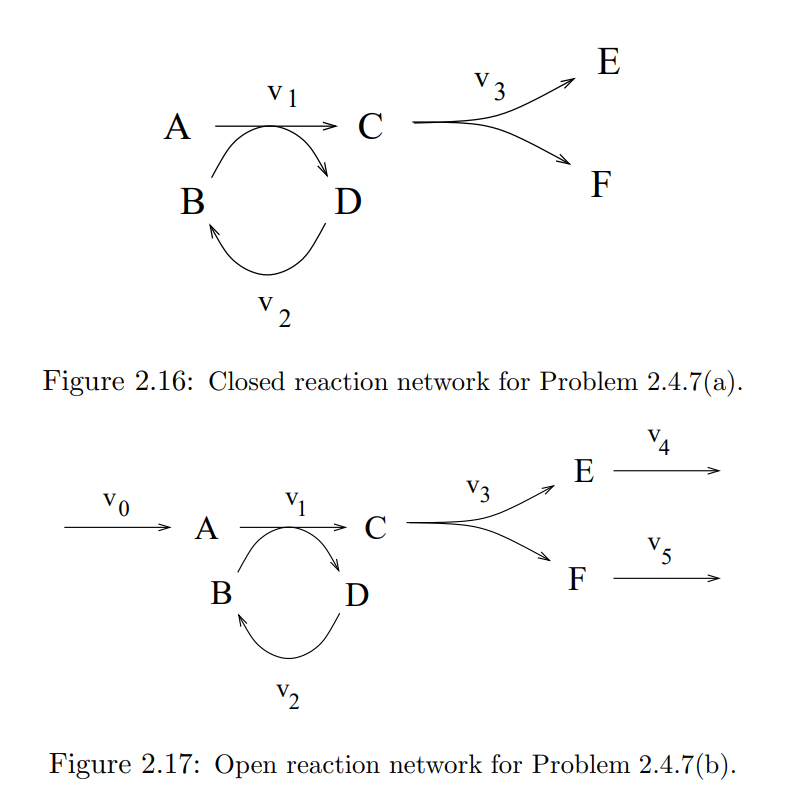

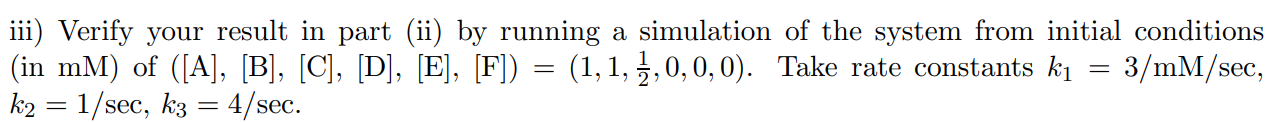

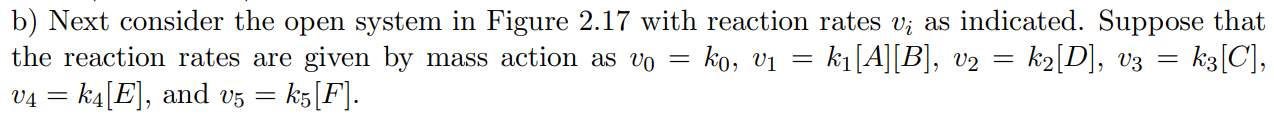

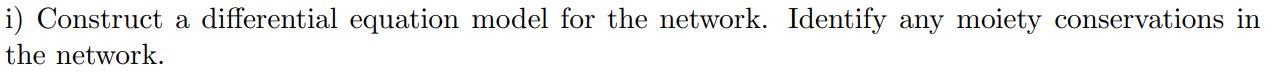

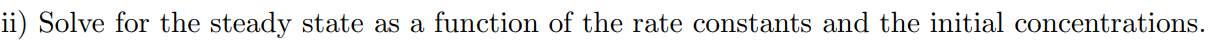

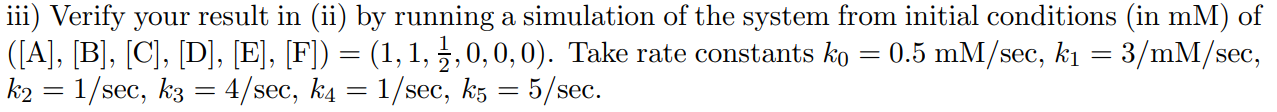

done in class ? 

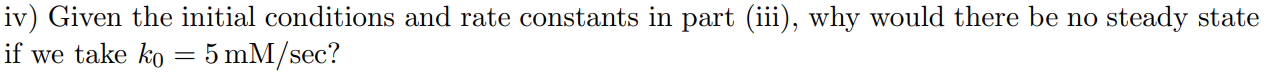

done in class ?

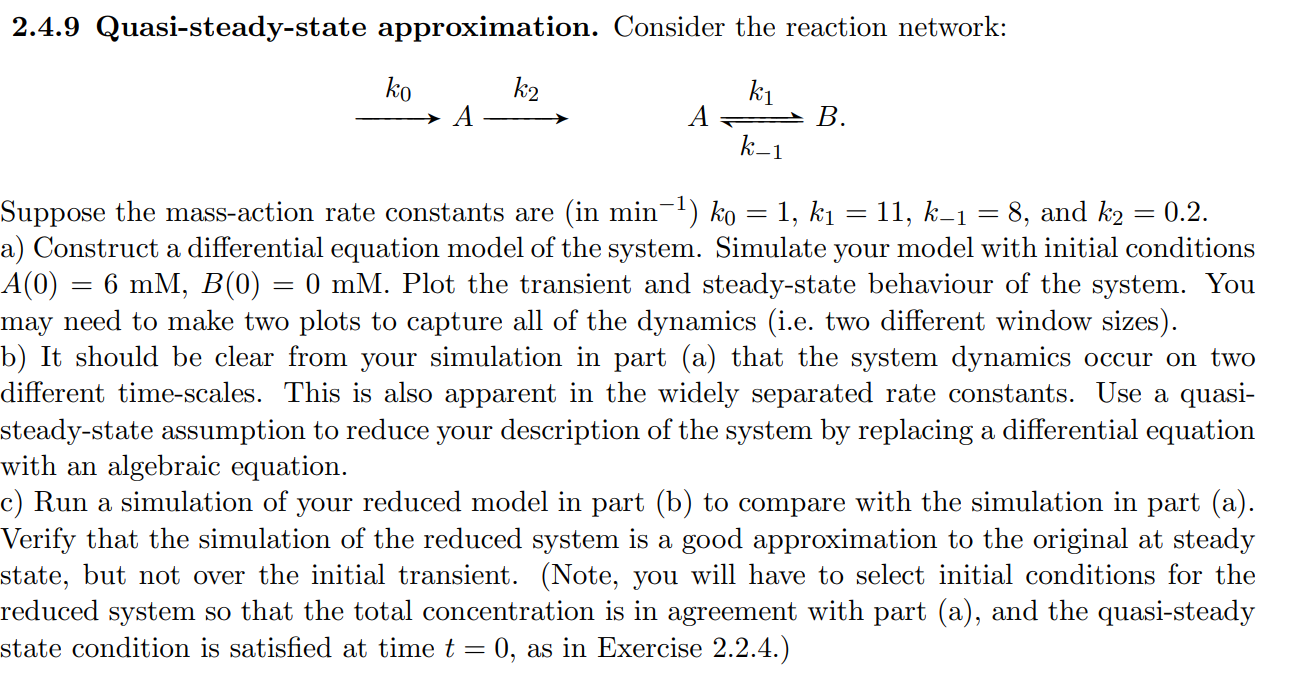

## Section 4 - Michaelis-Menten Kinetics

Use solve_ivp to model the full enzyme catalysis model (eqs. 3.3 in MMSB) and the quasi-steady state
approximation (eqs. 3.4 in MMSB). With the parameter set:  
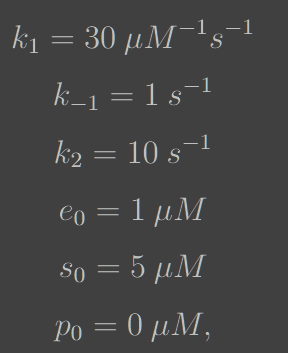  
  
  plot s(t) and p(t) for both models over a period from 0 to 1 seconds. Save the resulting plot as

Under what circumstances (i.e. combination of parameter values) is the approximate model accurate?